# Đề 4: Xây dựng mô hình dự đoán giá xe ô tô trên bộ dữ liệu 3

# 1. Import thư viện

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
import sklearn
from collections import Counter
%matplotlib inline

# train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor




# 2. Load dữ liệu

In [ ]:
path = "/content/drive/MyDrive/"
df = pd.read_csv(path+ '3. CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 3. Phân tích dữ liệu

## Phân tích chung

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Kiểm tra xem dữ liệu có bị thiếu không

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Chia train test

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train_file_path = path + 'train.csv'
test_file_path = path + 'test.csv'

In [ ]:
train_df.to_csv(train_file_path, index=False)
test_df.to_csv(test_file_path, index=False)

## Phân tích đơn biến

Phân tích phân phối của biến mục tiêu (giá xe ô tô)

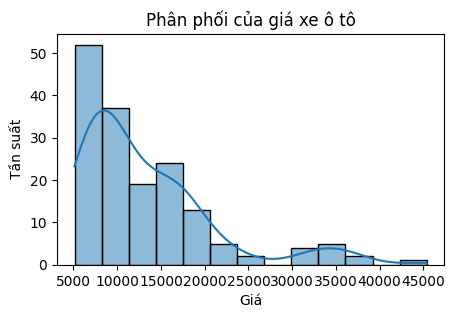

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(train_df['price'], kde=True)
plt.title('Phân phối của giá xe ô tô')
plt.xlabel('Giá')
plt.ylabel('Tần suất')
plt.show()

Biểu đồ phân phối cho thấy giá xe ô tô có phân phối không đối xứng, nghiêng về bên phải. Điều này cho thấy có một số ít xe có giá rất cao, trong khi phần lớn các xe có giá trong khoảng thấp hơn.

Phân tích các biến số học khác

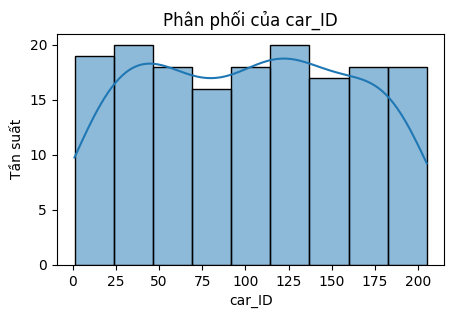

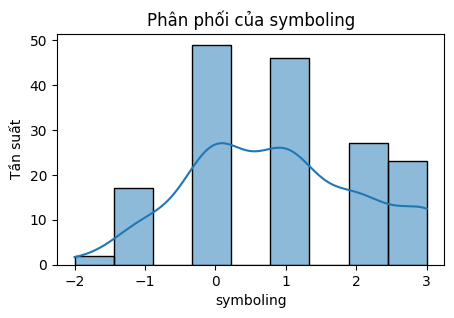

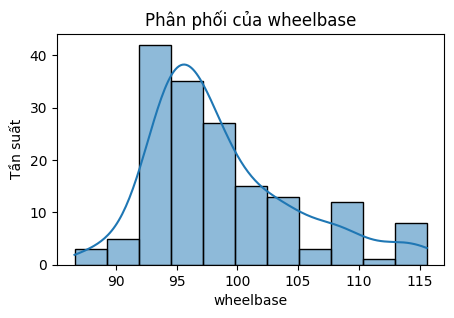

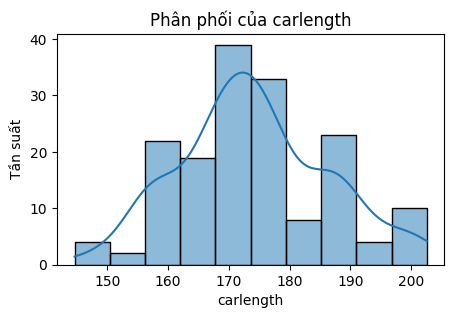

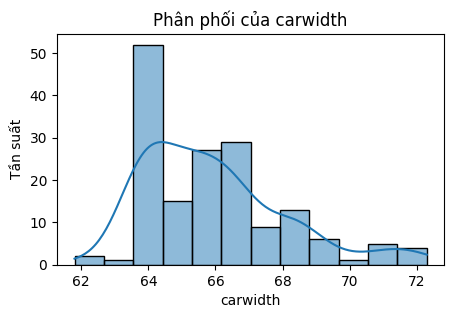

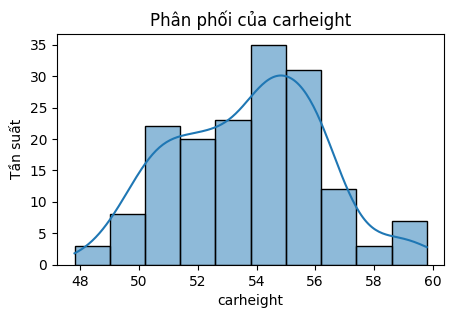

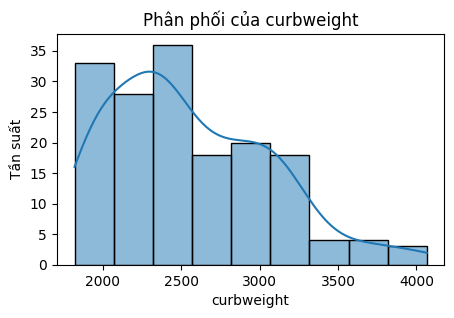

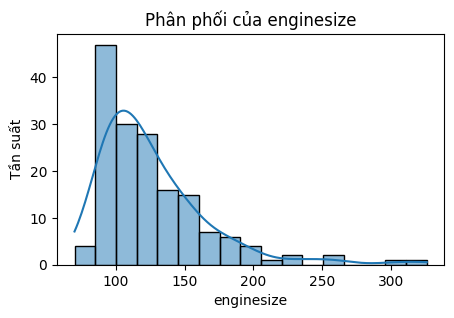

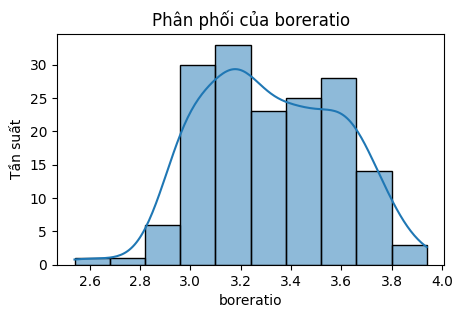

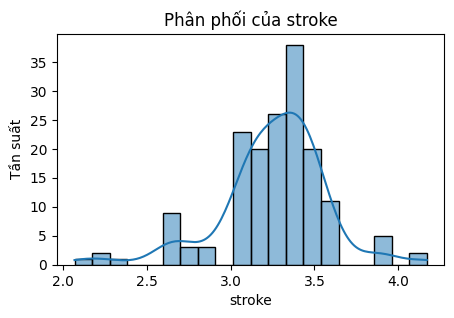

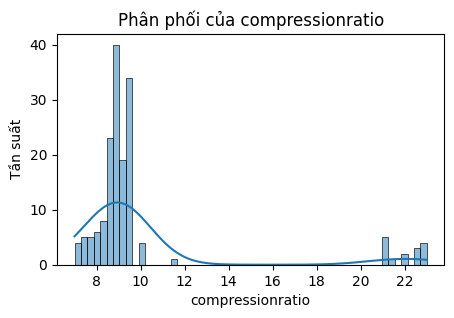

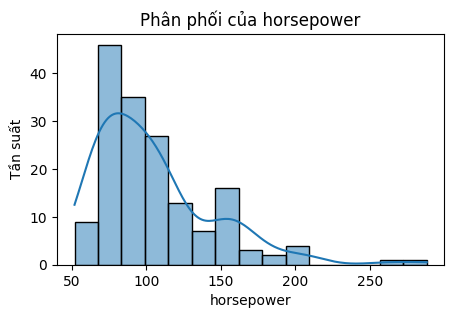

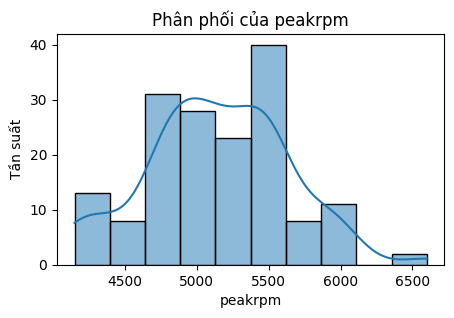

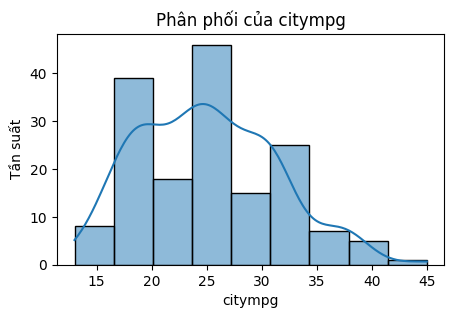

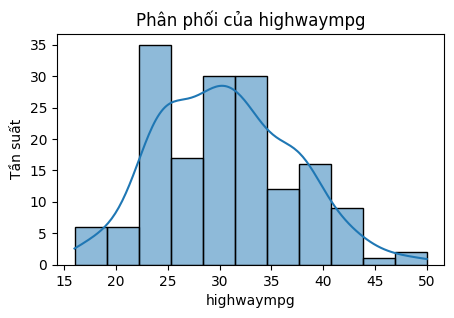

In [ ]:
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    if column != 'price':
        plt.figure(figsize=(5, 3))
        sns.histplot(train_df[column], kde=True)
        plt.title(f'Phân phối của {column}')
        plt.xlabel(column)
        plt.ylabel('Tần suất')
        plt.show()



*   Các biến như symboling, wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, và citympg đều có phân phối riêng. Một số biến có phân phối chuẩn, trong khi một số khác có phân phối lệch hoặc đa đỉnh.
*   Đặc biệt, enginesize, horsepower, và curbweight có vẻ như có mối liên hệ trực tiếp với giá xe ô tô, do phân phối của chúng khá rộng và không đối xứng.



## Phân tích đa biến

### Phân tích mối tương quan giữa các biến

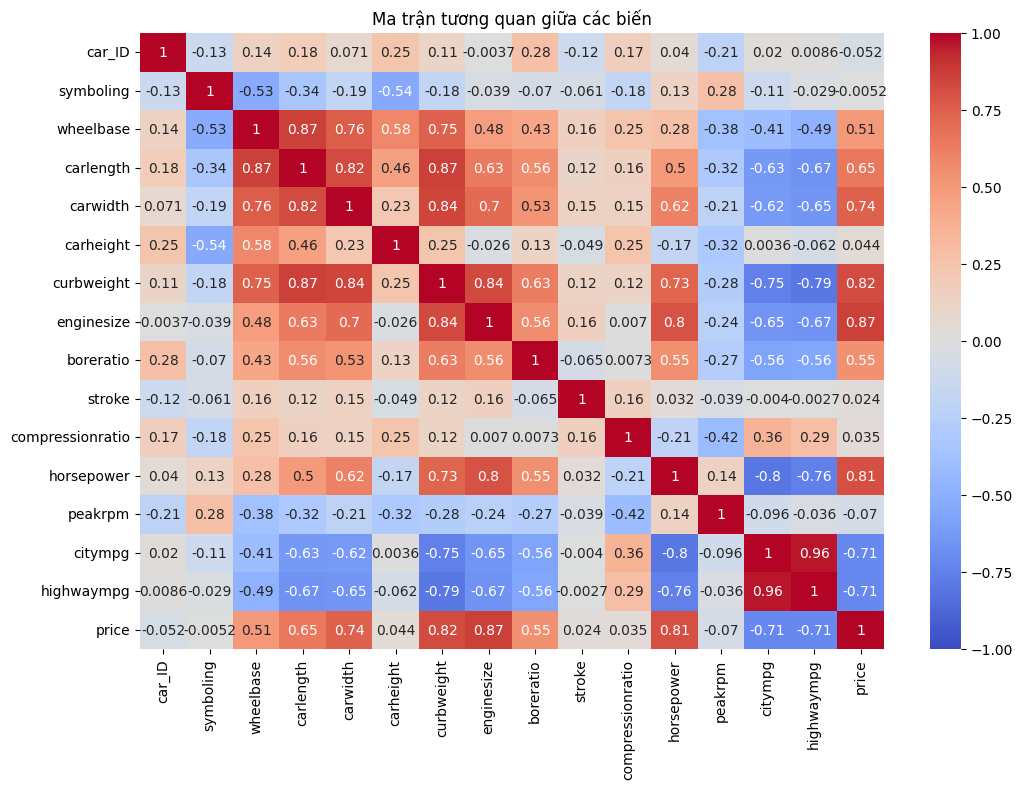

In [ ]:
# Ma trận tương quan giữa các biến
numeric_columns_only = train_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_columns_only.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các biến')
plt.show()

Ma trận tương quan cho thấy mối quan hệ giữa các biến số học. Các biến như enginesize, horsepower, curbweight, và wheelbase có mối tương quan cao với giá xe ô tô. Điều này có thể chỉ ra rằng những biến này là những biến độc lập quan trọng trong việc dự đoán giá xe.

### Phân tích mối quan hệ giữa giá xe và các biến độc lập quan trọng

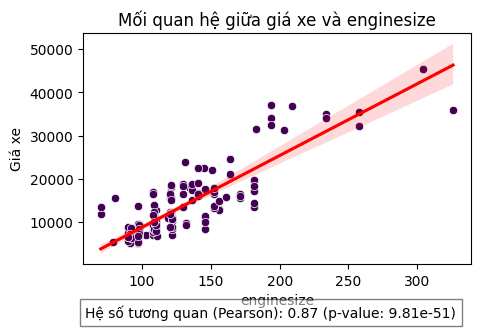

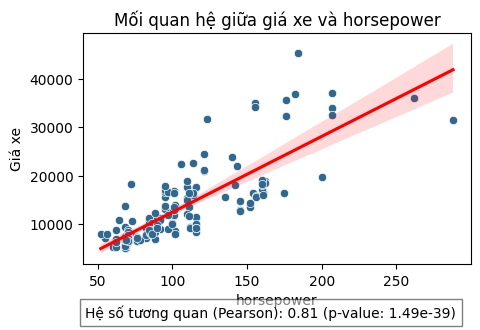

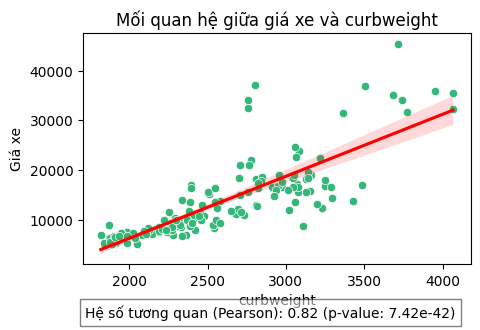

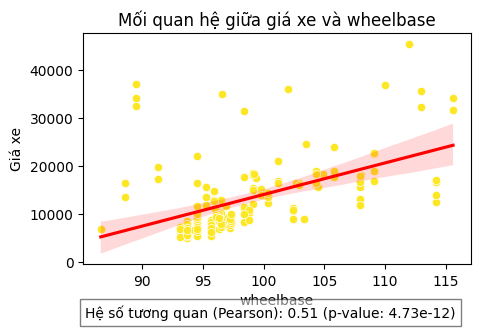

In [ ]:
selected_columns = ['enginesize', 'horsepower', 'curbweight', 'wheelbase']

# Generate colors for the selected columns
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_columns)))

# Plotting
for idx, column in enumerate(selected_columns):
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=train_df[column], y=train_df['price'], color=colors[idx])
    sns.regplot(x=train_df[column], y=train_df['price'], scatter=False, color='red')

    # Calculate correlation
    corr_coef, p_value = pearsonr(train_df[column], train_df['price'])

    # Plot title and labels
    plt.title(f'Mối quan hệ giữa giá xe và {column}')
    plt.xlabel(column)
    plt.ylabel('Giá xe')

    # Display correlation coefficient below the plot
    plt.figtext(0.5, -0.05, f'Hệ số tương quan (Pearson): {corr_coef:.2f} (p-value: {p_value:.2e})',
                ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

1.Enginesize:

Mối quan hệ tuyến tính mạnh mẽ, với giá xe tăng khi enginesize tăng. Điều này cho thấy enginesize là một biến quan trọng trong việc dự đoán giá xe.

2.Horsepower:

Mối quan hệ tuyến tính rõ ràng. Giá xe tăng khi horsepower tăng. Horsepower cũng là một yếu tố quan trọng trong dự đoán giá xe.

3.Curbweight:

Có mối quan hệ tuyến tính, với giá xe tăng khi curbweight tăng. Điều này cho thấy curbweight là một biến số học quan trọng.

4.Wheelbase:

Mối quan hệ tương đối tuyến tính, giá xe tăng khi wheelbase tăng. Wheelbase có thể ảnh hưởng đến giá xe nhưng không mạnh bằng các biến khác.



# 4. Lựa chọn thuộc tính

Dựa trên các phân tích đơn biến và đa biến, có thể thấy rằng một số biến số học như enginesize, horsepower, curbweight, và wheelbase có mối tương quan mạnh với giá xe. Do đó, chúng ta có thể sử dụng những biến này trong các mô hình dự đoán.

# 5. Thử nghiệm các mô hình

In [ ]:
# Chọn các biến độc lập quan trọng
X_train = train_df[['enginesize', 'horsepower', 'curbweight', 'wheelbase']]
y_train = train_df['price']

X_test = test_df[['enginesize', 'horsepower', 'curbweight', 'wheelbase']]
y_test = test_df['price']


Dựa trên phân tích dữ liệu và mối quan hệ giữa các biến độc lập và biến phụ thuộc (giá xe), chúng ta đã thấy rằng có các mối quan hệ tuyến tính mạnh giữa một số biến số học và giá xe, nhưng cũng có khả năng tồn tại các mối quan hệ phi tuyến tính.Mà đây là một bài toán hồi quy (regression) hơn là phân lớp hay phân cụm vì ta cần dự đoán một giá trị liên tục (giá xe).
Bằng cách so sánh hai mô hình hồi quy tuyến tính và cây quyết định hồi quy chúng ta có thể xác định xem mối quan hệ giữa các biến trong dữ liệu là tuyến tính hay phi tuyến tính, và từ đó chọn mô hình dự đoán phù hợp nhất.


## Mô hình hồi quy tuyến tính

Hồi quy tuyến tính là một mô hình thống kê đơn giản, giả định rằng mối quan hệ giữa các biến độc lập (X) và biến phụ thuộc (y) là tuyến tính. Mô hình này cố gắng tìm ra một đường thẳng (phương trình tuyến tính) tốt nhất để dự đoán giá trị của biến phụ thuộc dựa trên các biến độc lập.


In [ ]:

# Khởi tạo mô hình hồi quy tuyến tính
linear_model = LinearRegression()

# Huấn luyện mô hình
linear_model.fit(X_train, y_train)

# Dự đoán giá xe trên tập kiểm tra
y_pred_linear = linear_model.predict(X_test)

# Đánh giá mô hình
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2: {r2_linear}")


Linear Regression MSE: 13844677.680710819
Linear Regression R2: 0.8246266464965643


MSE (Mean Squared Error): 13,844,677.68

MSE là trung bình của bình phương lỗi dự đoán. MSE cao cho thấy rằng các dự đoán của mô hình hồi quy tuyến tính có độ lệch lớn so với giá thực tế của xe ô tô. Điều này có thể là do mô hình không đủ khả năng nắm bắt tất cả các yếu tố ảnh hưởng đến giá xe, đặc biệt là khi có các mối quan hệ phi tuyến tính trong dữ liệu.

R-squared (R²): 0.82

R² cho biết tỷ lệ biến động của biến phụ thuộc (giá xe) được giải thích bởi các biến độc lập trong mô hình. Với R² là 0.82, mô hình hồi quy tuyến tính giải thích khoảng 82% biến động của giá xe. Điều này cho thấy mô hình có khả năng giải thích một phần lớn sự thay đổi của giá xe, nhưng vẫn còn một phần không nhỏ của biến động chưa được giải thích.

## Cây quyết định hồi quy

Cây quyết định hồi quy là một mô hình phi tuyến tính, sử dụng cấu trúc cây để dự đoán giá trị của biến phụ thuộc. Mô hình này phân chia dữ liệu thành các nhóm nhỏ dựa trên các điều kiện đơn giản, sau đó sử dụng giá trị trung bình của nhóm đó để đưa ra dự đoán.

In [ ]:

# Khởi tạo mô hình cây quyết định hồi quy
tree_model = DecisionTreeRegressor(random_state=42)

# Huấn luyện mô hình
tree_model.fit(X_train, y_train)

# Dự đoán giá xe trên tập kiểm tra
y_pred_tree = tree_model.predict(X_test)

# Đánh giá mô hình
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression MSE: {mse_tree}")
print(f"Decision Tree Regression R2: {r2_tree}")


Decision Tree Regression MSE: 5943316.8378997315
Decision Tree Regression R2: 0.9247147944622718


MSE (Mean Squared Error): 5,943,316.84

MSE thấp hơn so với mô hình hồi quy tuyến tính cho thấy rằng mô hình cây quyết định hồi quy có độ chính xác cao hơn trong việc dự đoán giá xe. Mô hình này có thể nắm bắt các mối quan hệ phi tuyến tính và các yếu tố tương tác giữa các biến, dẫn đến sự giảm thiểu lỗi dự đoán.

R-squared (R²): 0.92

R² cao hơn cho thấy mô hình cây quyết định hồi quy giải thích khoảng 92% biến động của giá xe. Điều này cho thấy mô hình này có khả năng dự đoán giá xe rất tốt và nắm bắt các mối quan hệ phức tạp trong dữ liệu.

# 6. Kết luận

Dựa vào việc phân tích dữ liệu và đánh giá mô hình huấn luyện ta có thể rút ra kết luận là việc sử dụng mô hình cây quyết định hồi quy có hiệu quả tốt hơn cho việc dự đoán giá xe ô tô với tập dữ liệu đã cho.